In [15]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [16]:
data = pd.read_csv('mnist_train.csv')

In [17]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data = np.array(data)
m,n =data.shape
np.random.shuffle(data)

data_dev =data[0:1000].T #transposing the matrix
Y_dev =data_dev[0]
X_dev =data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape


In [19]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5 #generate random numbers between 0 and 1 so we substract by 0.5 to be between -0.5 and 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0) #returns the number if is > 0 but returns 0 when it is < 0

def softmax(Z): # activation function
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):#forward propagation function
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0 #since deriv. is 1 when when positive and 0 when negative

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T #flipping
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y): #backward propagation function
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [20]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [21]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)#training the neural network

Iteration:  0
[1 1 2 ... 9 1 1] [9 7 6 ... 0 4 4]
0.06084745762711864
Iteration:  10
[3 5 7 ... 7 7 1] [9 7 6 ... 0 4 4]
0.1326271186440678
Iteration:  20
[7 5 7 ... 7 7 1] [9 7 6 ... 0 4 4]
0.20216949152542374
Iteration:  30
[7 9 4 ... 8 4 1] [9 7 6 ... 0 4 4]
0.25601694915254236
Iteration:  40
[7 8 4 ... 8 4 1] [9 7 6 ... 0 4 4]
0.29847457627118645
Iteration:  50
[7 7 2 ... 8 4 1] [9 7 6 ... 0 4 4]
0.3532542372881356
Iteration:  60
[7 7 2 ... 8 4 1] [9 7 6 ... 0 4 4]
0.41628813559322037
Iteration:  70
[7 7 2 ... 0 4 1] [9 7 6 ... 0 4 4]
0.47335593220338984
Iteration:  80
[7 7 2 ... 0 4 1] [9 7 6 ... 0 4 4]
0.5214576271186441
Iteration:  90
[7 7 6 ... 0 4 9] [9 7 6 ... 0 4 4]
0.5621186440677967
Iteration:  100
[7 7 6 ... 0 4 9] [9 7 6 ... 0 4 4]
0.5943559322033898
Iteration:  110
[7 7 6 ... 0 4 9] [9 7 6 ... 0 4 4]
0.6222542372881356
Iteration:  120
[7 7 6 ... 0 4 9] [9 7 6 ... 0 4 4]
0.6447796610169492
Iteration:  130
[7 7 6 ... 0 4 9] [9 7 6 ... 0 4 4]
0.6639491525423729
Iteration: 

as we can see here we got about 83% accuracy at the end

In [22]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]#converting the pixel values to an image
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255 
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')#displaying the image
    plt.show()

Prediction:  [7]
Label:  9


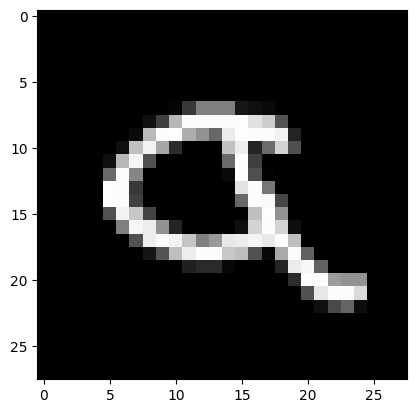

Prediction:  [7]
Label:  7


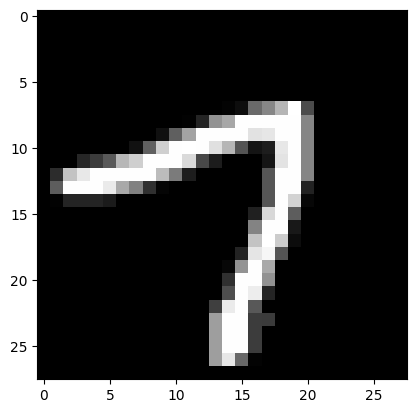

Prediction:  [0]
Label:  0


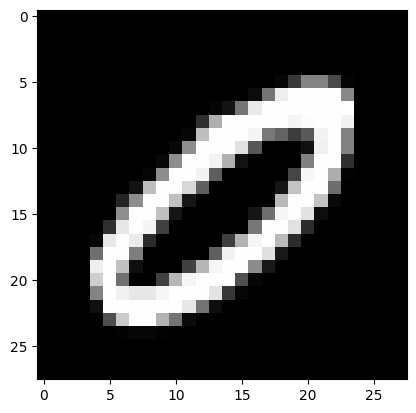

Prediction:  [8]
Label:  8


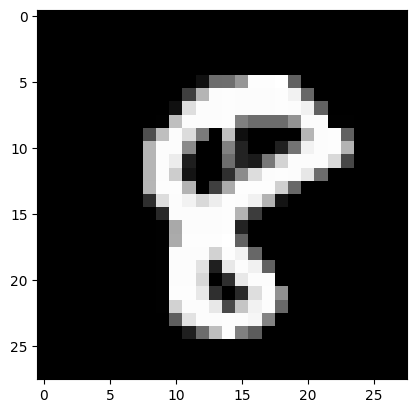

In [28]:
#testing our model
test_prediction(0, W1, b1, W2, b2)
test_prediction(105, W1, b1, W2, b2)
test_prediction(89, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
# we get an avergae of 85% accuracy with this simple model